In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# load files
train = pd.read_csv('../data/gender_age_train.csv')
test = pd.read_csv('../data/gender_age_test.csv')

In [3]:
train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [4]:
test.head()

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


In [5]:
print len(test) > len(train)

True


** More records in the test set than there are in the training set **

In [48]:
data = pd.concat([train, test], axis=0)

** Concatenate both training and test datasets **

###  Question 1 Are there any device ids in test set that are also present in the training set 

In [7]:
print any(pd.Series(test.device_id.unique()).isin(train.device_id))

False


** So there are no device ids which are in test as well as train ids. **

In [8]:
train.device_id.value_counts().describe()

count    74645.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: device_id, dtype: float64

In [9]:
test.device_id.value_counts().describe()

count    112071.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: device_id, dtype: float64

** No duplicate records for any device_id in train as well as test set. **

In [10]:
train.gender.value_counts()

M    47904
F    26741
Name: gender, dtype: int64

** More males than females in the training set. **

In [11]:
train.age.describe()

count    74645.000000
mean        31.410342
std          9.868735
min          1.000000
25%         25.000000
50%         29.000000
75%         36.000000
max         96.000000
Name: age, dtype: float64

** Distribution of age in the training set **

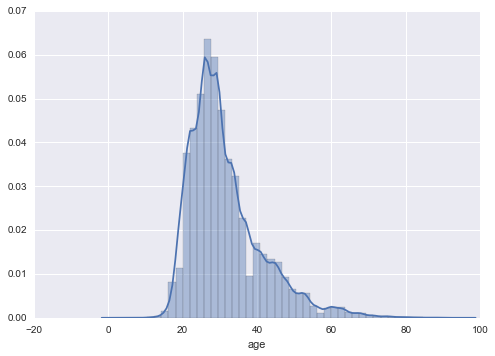

In [12]:
sns.distplot(train.age);

** Minimum age recorded is 1 and Maximum age recorded is 96. Need to look into this to see if this need to be corrected. **

In [13]:
train.group.value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

** Distribution of target variable ( Multi-Class Classification ) problem. **

### Device related information

In [49]:
device = pd.read_csv('../data/phone_brand_device_model.csv')
device = device.drop_duplicates('device_id')
device.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [50]:
devices_ = pd.merge(data, device, on='device_id', how='left'); data.head()

,age,device_id,gender,group
0,35.0,-8076087639492063270,M,M32-38
1,35.0,-2897161552818060146,M,M32-38
2,35.0,-8260683887967679142,M,M32-38
3,30.0,-4938849341048082022,M,M29-31
4,30.0,245133531816851882,M,M29-31


In [51]:
brand_freq = devices_.groupby('phone_brand').size().to_dict()
devices_['brand_popularity'] = devices_.phone_brand.map(lambda x: brand_freq[x])

In [52]:
model_freq = devices_.groupby('device_model').size().to_dict()
devices_['model_popularity'] = devices_.device_model.map(lambda x: model_freq[x])

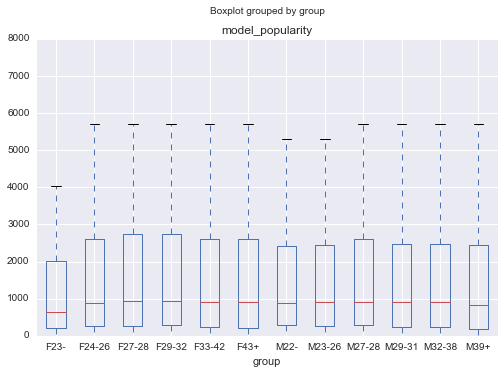

In [53]:
devices_.boxplot(column='model_popularity', by='group');

In [54]:
devices_.head()

,age,device_id,gender,group,phone_brand,device_model,brand_popularity,model_popularity
0,35.0,-8076087639492063270,M,M32-38,小米,MI 2,43107,1310
1,35.0,-2897161552818060146,M,M32-38,小米,MI 2,43107,1310
2,35.0,-8260683887967679142,M,M32-38,小米,MI 2,43107,1310
3,30.0,-4938849341048082022,M,M29-31,小米,红米note,43107,7343
4,30.0,245133531816851882,M,M29-31,小米,MI 3,43107,5699


## Events

In [43]:
events = pd.read_csv('../data/events.csv', parse_dates=['timestamp'])
events = events.drop_duplicates()
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [84]:
events_ = pd.merge(devices_, events, on='device_id', how='left')
events_ = events_.drop_duplicates()

In [88]:
events_.head()

,age,device_id,gender,group,phone_brand,device_model,brand_popularity,model_popularity,event_id,timestamp,longitude,latitude
0,35.0,-8076087639492063270,M,M32-38,小米,MI 2,43107,1310,NaN,NaT,NaN,NaN
1,35.0,-2897161552818060146,M,M32-38,小米,MI 2,43107,1310,NaN,NaT,NaN,NaN
2,35.0,-8260683887967679142,M,M32-38,小米,MI 2,43107,1310,2479656.0,2016-05-01 14:23:37,0.0,0.0
3,30.0,-4938849341048082022,M,M29-31,小米,红米note,43107,7343,NaN,NaT,NaN,NaN
4,30.0,245133531816851882,M,M29-31,小米,MI 3,43107,5699,NaN,NaT,NaN,NaN


In [100]:
events_['event_generated'] = events_.event_id.isnull().astype(int)

In [102]:
train_processed = events_.loc[events_.group.notnull(), ['device_id', 'group', 'phone_brand', 'device_model',\
                                                        'brand_popularity', 'model_popularity', 'event_generated']]
test_processed = events_.loc[events_.group.isnull(), ['device_id', 'phone_brand', 'device_model',\
                                                        'brand_popularity', 'model_popularity', 'event_generated']]

In [108]:
train_processed.loc[train_processed.device_id == .value_counts()]

NameError: name 'device_id' is not defined

In [106]:
train_processed.dev

(74645, 4)

In [103]:
train_processed.shape, test_processed.shape

((1266931, 7), (2021699, 6))

In [27]:
train_processed.to_csv('../processed/train_processed.csv', index=False)
test_processed.to_csv('../processed/test_processed.csv', index=False)